## LIMPIEZA

In [1]:
import pandas as pd
import numpy as np
df2 = pd.read_csv("features_csv.csv", quotechar='"',
               usecols=['class','post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_acceptans',
                'score_prev_ans','score_prev_comment',
                'score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags','num_words','code_length']
                   )
df2.head()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,age_user,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,code_length
0,1,0,0,0,110,134,8,0,0,0,...,15.0,21,7,12,4,0,1,2,145.0,2991.0
1,1,8,0,1,190,30,4,0,0,0,...,939.0,80,3,3,0,0,1,2,23.0,2972.0
2,1,0,1,2,2079,37,55,0,0,0,...,0.0,85,1,10,3,0,1,4,102.0,327.0
3,1,1,0,0,204,7,0,0,0,0,...,0.0,31,1,2,0,0,1,2,30.0,261.0
4,1,5,0,-1,57,15,7,0,0,-1,...,298.0,61,1,5,0,0,2,3,84.0,612.0


Se obtienen estadísticas del dataset para detectar outliers. 

In [2]:
num_features = ['post_comment_count',
                'post_favorite_count','post_score',
                'post_view_count','users_reputation','users_up_votes',
                'users_down_votes','score_prev_acceptans',
                'score_prev_ans','score_prev_comment',
                'score_prev_question','score_prev_favquestion',
                'age_user','title_length','num_block_code','num_i_sentences',
                'num_wh_words','num_y_sentences','tags_popularity','num_tags','num_words','code_length']

In [3]:
df_statistics=pd.DataFrame(index=num_features)
for index, row in df_statistics.iterrows():
    df_statistics.loc[index,"min"]=df2[index].min()
    df_statistics.loc[index,"max"] = df2[index].max()
    df_statistics.loc[index,"mean"] = df2[index].mean()
    df_statistics.loc[index,"std"] = df2[index].std()
    df_statistics.loc[index,"var"] = df2[index].var()
df_statistics

,min,max,mean,std,var
post_comment_count,0.0,38.0,2.83385,3.012457,9.074898e+00
post_favorite_count,0.0,204.0,0.20250,1.706382,2.911739e+00
post_score,-11.0,284.0,0.89285,3.874793,1.501402e+01
post_view_count,5.0,227453.0,399.96845,2540.775961,6.455542e+06
users_reputation,1.0,666690.0,1171.29105,8417.321886,7.085131e+07
users_up_votes,0.0,29496.0,170.90780,698.433331,4.878091e+05
users_down_votes,0.0,11788.0,16.17880,179.069700,3.206596e+04
score_prev_acceptans,-14.0,58871.0,35.56555,554.644810,3.076309e+05
score_prev_ans,-17.0,74441.0,63.00365,780.528884,6.092253e+05
score_prev_comment,0.0,19977.0,25.24695,227.321026,5.167485e+04


Todos los atributos tienen una varianza significativa para considerarlos en el análisis. El atributo age_user tiene un valor negativo, que se elimina del dataset este registro y se analiza las características que tienen valores maximos demasiado elevados. 
El atributo num_words tiene 0 como valor mínimo, esto puede deberse a que la pregunta posee solamente código o texto en tags diferentes a listas y párrafos. Por el momento eliminaremos estos registros y dependiendo de la cantidad que se eliminen, se analizará con mayor de talle el texto de estos registros.

In [4]:
df2= df2.loc[df2['num_words'] >0,:]
df2= df2.loc[df2['age_user'] >=0, :]
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,age_user,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,code_length
count,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,...,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000
mean,0.499975,2.834159,0.202561,0.893491,400.137276,1171.931462,171.001551,16.187703,35.585122,63.038321,...,636.357096,53.515684,1.486918,3.677673,1.119566,0.013257,1.449697,3.058482,49.361149,1008.508230
std,0.500013,3.012957,1.706836,3.875619,2541.463799,8419.593434,698.614051,179.118565,554.796780,780.742229,...,640.555880,20.219912,1.419648,3.073334,1.346514,0.126823,0.981637,1.207189,40.341726,2024.939943
min,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.000000,-14.000000,-17.000000,...,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,18.000000,0.000000,0.000000,0.000000,0.000000,...,59.000000,39.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,25.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,103.000000,93.000000,13.000000,0.000000,0.000000,1.000000,...,442.000000,50.000000,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,40.000000,367.000000
75%,1.000000,4.000000,0.000000,1.000000,267.000000,560.000000,86.000000,2.000000,4.000000,11.000000,...,1055.000000,64.000000,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,62.000000,1091.000000
max,1.000000,38.000000,204.000000,284.000000,227453.000000,666690.000000,29496.000000,11788.000000,58871.000000,74441.000000,...,2719.000000,150.000000,19.000000,44.000000,14.000000,5.000000,5.000000,5.000000,1521.000000,28847.000000


Se eliminaron solamente 6 registros. A continuación se analizará los atributos con valores demasiado altos.

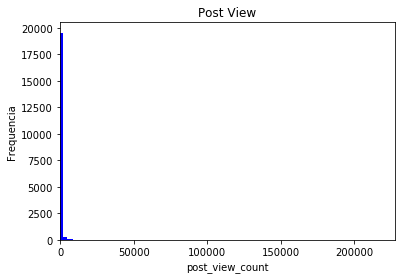

In [5]:
import matplotlib.pyplot as plt
plt.hist(df2['post_view_count'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['post_view_count'].max())
plt.title("Post View")
plt.ylabel("Frequencia")
plt.xlabel("post_view_count")
plt.show()

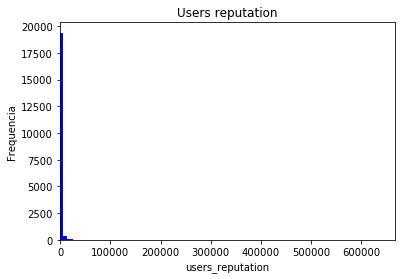

In [6]:
plt.hist(df2['users_reputation'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['users_reputation'].max())
plt.title("Users reputation")
plt.ylabel("Frequencia")
plt.xlabel("users_reputation")
plt.show()

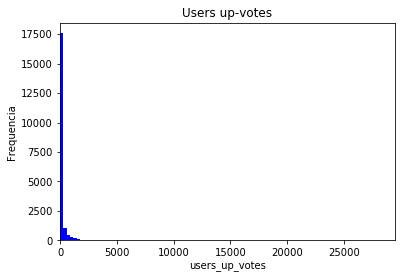

In [7]:
plt.hist(df2['users_up_votes'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['users_up_votes'].max())
plt.title("Users up-votes")
plt.ylabel("Frequencia")
plt.xlabel("users_up_votes")
plt.show()

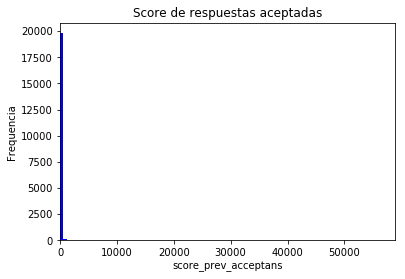

In [8]:
plt.hist(df2['score_prev_acceptans'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['score_prev_acceptans'].max())
plt.title("Score de respuestas aceptadas")
plt.ylabel("Frequencia")
plt.xlabel("score_prev_acceptans")
plt.show()

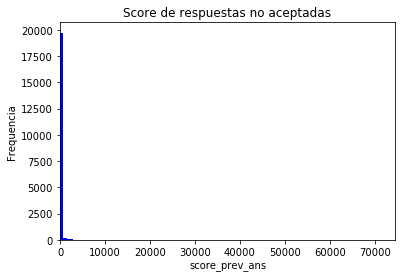

In [9]:
plt.hist(df2['score_prev_ans'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['score_prev_ans'].max())
plt.title("Score de respuestas no aceptadas")
plt.ylabel("Frequencia")
plt.xlabel("score_prev_ans")
plt.show()

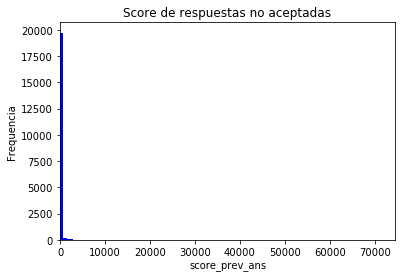

In [10]:
plt.hist(df2['score_prev_ans'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['score_prev_ans'].max())
plt.title("Score de respuestas no aceptadas")
plt.ylabel("Frequencia")
plt.xlabel("score_prev_ans")
plt.show()

Los valores altos de las características analizadas son de un valor reducido de datos. Creamos una matriz de correlación para identificar atributos que se puedan eliminar por que tienen una alta correlación.

In [11]:
import seaborn as sns
df_rel=pd.DataFrame(data=df2, columns=['users_reputation', 'users_up_votes',
                'users_down_votes', 'score_prev_acceptans',
                'score_prev_ans', 'score_prev_comment',
                'score_prev_question', 'score_prev_favquestion',
                'age_user'], index=df2.index)

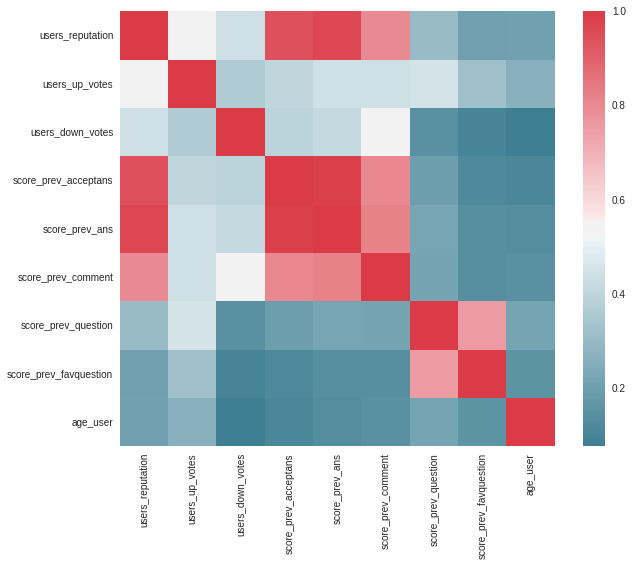

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_rel.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

Se puede ver que las características que corresponden al score de las respuestas dadas por el usuarios (score_prev_acceptans, score_prev_ans) tienen alta correlación con su reputación; sin embargo creemos por el momento considerar estos atributos y posteriormente analizar grupos que tengan valores similares en estas características.
Filtramos los datos para eliminar los registros que tengan el atibuto users_reputation demasiado alto.

In [13]:
df2= df2.loc[df2['users_reputation'] <10000, :]

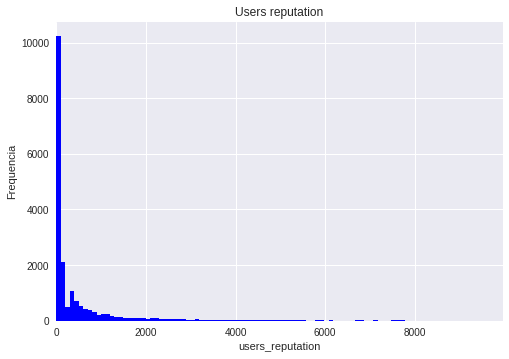

In [14]:
plt.hist(df2['users_reputation'], bins=100, color="blue")
plt.xlim(xmin=0, xmax=df2['users_reputation'].max())
plt.title("Users reputation")
plt.ylabel("Frequencia")
plt.xlabel("users_reputation")
plt.show()

In [15]:
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,age_user,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,code_length
count,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,...,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000,19606.000000
mean,0.498062,2.832143,0.193665,0.838876,391.875905,579.809242,124.229573,8.826533,10.481077,22.075946,...,614.635673,53.438896,1.485515,3.682342,1.120422,0.013006,1.451953,3.058911,49.334795,1015.742069
std,0.500009,3.007807,1.692380,3.482459,2495.739309,1249.651617,393.011273,83.587698,37.976133,69.494568,...,620.070652,20.180873,1.416221,3.077554,1.347212,0.124459,0.982537,1.206481,40.267808,2036.064867
min,0.000000,0.000000,0.000000,-11.000000,5.000000,1.000000,0.000000,0.000000,-14.000000,-17.000000,...,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,39.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2.000000,25.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,103.000000,88.000000,12.000000,0.000000,0.000000,0.000000,...,425.000000,50.000000,1.000000,3.000000,1.000000,0.000000,1.000000,3.000000,40.000000,371.000000
75%,1.000000,4.000000,0.000000,1.000000,266.000000,514.000000,77.000000,2.000000,3.000000,10.000000,...,1021.000000,64.000000,2.000000,5.000000,2.000000,0.000000,2.000000,4.000000,62.000000,1100.000000
max,1.000000,38.000000,204.000000,284.000000,227453.000000,9961.000000,9593.000000,5804.000000,866.000000,1208.000000,...,2710.000000,150.000000,19.000000,44.000000,14.000000,5.000000,5.000000,5.000000,1521.000000,28847.000000


Con el filtro aplicado se tiene 4912 registros, es decir menos del 5% tenían valores altos en el atributo users_reputation y en los atributos de score relacionados.

## Análisis

Debido a la heterogeneidad del dataset es necesario normalizar los datos, para ello usamos la función z-score que sirve para normalizar los datos cuando la diferencia entre el valor mínimo y máximo es demasiado grande.

In [16]:
for each in num_features:
    mean, std = df2[each].mean(), df2[each].std()
    df2.loc[:, each] = (df2[each] - mean)/std
df2.describe()

,class,post_comment_count,post_favorite_count,post_score,post_view_count,users_reputation,users_up_votes,users_down_votes,score_prev_acceptans,score_prev_ans,...,age_user,title_length,num_block_code,num_i_sentences,num_wh_words,num_y_sentences,tags_popularity,num_tags,num_words,code_length
count,19606.000000,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,...,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04,1.960600e+04
mean,0.498062,-3.407705e-14,-6.168758e-15,7.425916e-15,-8.808000e-17,4.347232e-16,-1.610453e-15,-3.611169e-15,-5.020683e-15,2.031688e-15,...,3.928958e-16,2.268352e-16,-2.854260e-15,2.298251e-16,4.958902e-15,8.111661e-16,-4.706471e-16,1.503071e-16,5.410093e-16,6.487438e-16
std,0.500009,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-9.415973e-01,-1.144336e-01,-3.399574e+00,-1.550145e-01,-4.631765e-01,-3.160967e-01,-1.055961e-01,-6.446438e-01,-5.622878e-01,...,-9.912349e-01,-1.904719e+00,-1.048929e+00,-1.196516e+00,-8.316600e-01,-1.045019e-01,-1.477760e+00,-1.706542e+00,-1.200333e+00,-4.988751e-01
25%,0.000000,-9.415973e-01,-1.144336e-01,-2.408861e-01,-1.369838e-01,-4.511731e-01,-3.160967e-01,-1.055961e-01,-2.759912e-01,-3.176643e-01,...,-9.025353e-01,-7.154743e-01,-1.048929e+00,-5.466491e-01,-8.316600e-01,-1.045019e-01,-4.599864e-01,-8.776854e-01,-6.043238e-01,-4.988751e-01
50%,0.000000,-2.766611e-01,-1.144336e-01,-2.408861e-01,-1.157476e-01,-3.935571e-01,-2.855632e-01,-1.055961e-01,-2.759912e-01,-3.176643e-01,...,-3.058291e-01,-1.704037e-01,-3.428241e-01,-2.217157e-01,-8.938632e-02,-1.045019e-01,-4.599864e-01,-4.882841e-02,-2.318178e-01,-3.166609e-01
75%,1.000000,3.882751e-01,-1.144336e-01,4.626735e-02,-5.043632e-02,-5.266207e-02,-1.201736e-01,-8.166911e-02,-1.969942e-01,-1.737682e-01,...,6.553517e-01,5.233224e-01,3.632805e-01,4.281510e-01,6.528874e-01,-1.045019e-01,5.577874e-01,7.800285e-01,3.145243e-01,4.138273e-02
max,1.000000,1.169219e+01,1.204259e+02,8.131069e+01,9.097950e+01,7.507045e+00,2.409287e+01,6.933046e+01,2.252780e+01,1.706499e+01,...,3.379235e+00,4.784783e+00,1.236706e+01,1.310055e+01,9.560172e+00,4.006930e+01,3.611109e+00,1.608885e+00,3.654694e+01,1.366914e+01


Se usa el clasificador Super Vector Machine lineal, considerando que existen dos clases, además se realiza la clasificación con grupos de entrenamiento para finalmente realizar la predicción. Debido a que el dataset contiene el 22% de la clase 0, esperamos que el valor Recall sea alto.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

X = df2.iloc[:,1:]
y = df2.iloc[:,0]

clf=svm.SVC(kernel="linear",random_state=10)

In [18]:
print("Clasificador SVM")
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Clasificador SVM

             precision    recall  f1-score   support

          0       0.62      0.68      0.65        22
          1       0.73      0.68      0.70        28

avg / total       0.68      0.68      0.68        50



Con el clasificador SVM obtuvimos recall y precision de 0 para la clase 1 y recall 1 para la clase 1, en este caso para evitar un sobreajuste de los datos, cambiamos los grupos de entrenamiento por el método cross-validation, que permite considerar la clase de menor proporción en los conjuntos de ejemplo con mayor probabilidad. Usamos la raíz de N como k-fold.

In [19]:
clf=svm.SVC(kernel="linear",random_state=10)
y_pred=cross_val_predict(clf, X, y, cv=70)
print("SVM - Cross-validation")
print(classification_report(y, y_pred))

SVM - Cross-validation
             precision    recall  f1-score   support

          0       0.67      0.68      0.68      9841
          1       0.68      0.67      0.67      9765

avg / total       0.67      0.67      0.67     19606



Se obtuvo un menor valor de precision para la clase 1 usando cross-validation, sin embargo no obtenemos buenos resultados para la clase 0.

Para evaluar el clasificador usamos DummyClassifier además de otros clasificadores como Decision Tree, Naive Bayes y KNeighbors, para comparar los resultados.

Para el DummyClassifier se aplica la estrategia "stratify", para que la muestra sea equitativa para las 2 clases.

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

c1 = ("Decision Tree", DecisionTreeClassifier())
c2 = ("Gaussian NB", GaussianNB())
# Para definir el numero de vecinos para KNN se aplica la raiz cuadrada de n 
c3 = ("KNeighbors", KNeighborsClassifier(n_neighbors=70))
c4 =  ("SVC",svm.SVC(kernel="linear",random_state=10))
c5 = ("Dummy: stratified", DummyClassifier(strategy="stratified", random_state=10))

clasificadores=[c1, c2, c3, c4, c5]

summary=pd.DataFrame(index=['precision','recall', 'f1', 'accuracy'], columns=['Decision Tree','Gaussian NB','KNeighbors','SVC',
                                                                              'Dummy: stratified'])

In [37]:
for name, clf in clasificadores:
    print(name)
    clf.fit(X,y)
    y_pred=cross_val_predict(clf, X, y, cv=70)
    print(classification_report(y, y_pred))
    summary.loc['precision',name]=np.mean(metrics.precision_score(y, y_pred,average='weighted', labels=[0,1]))
    summary.loc['recall', name] = np.mean(metrics.recall_score(y, y_pred,average='weighted', labels=[0,1]))
    summary.loc['f1', name] = np.mean(metrics.f1_score(y, y_pred,average='weighted', labels=[0,1]))
    summary.loc['accuracy', name]=np.mean(metrics.accuracy_score(y, y_pred))

summary

Decision Tree
             precision    recall  f1-score   support

          0       0.37      0.39      0.38      1116
          1       0.82      0.80      0.81      3796

avg / total       0.72      0.71      0.71      4912

Gaussian NB
             precision    recall  f1-score   support

          0       0.27      0.88      0.41      1116
          1       0.89      0.29      0.44      3796

avg / total       0.75      0.43      0.44      4912

KNeighbors


/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1116
          1       0.77      1.00      0.87      3796

avg / total       0.60      0.77      0.67      4912

SVC
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1116
          1       0.77      1.00      0.87      3796

avg / total       0.60      0.77      0.67      4912

Dummy: stratified
             precision    recall  f1-score   support

          0       0.20      0.19      0.20      1116
          1       0.77      0.78      0.77      3796

avg / total       0.64      0.65      0.64      4912



/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Decision Tree,Gaussian NB,KNeighbors,SVC,Dummy: stratified
precision,0.716847,0.751131,0.597222,0.597222,0.637725
recall,0.711116,0.427728,0.772801,0.772801,0.645765
f1,0.713872,0.435998,0.673761,0.673761,0.641649
accuracy,0.711116,0.427728,0.772801,0.772801,0.645765


De los resultados individuales obtenidos se puede observar que KNN y SVC clasifican en la clase 1 a todas las preguntas y al probar con Decision Tree y Gaussian NB vemos que Decision Tree proporciona un buen Recall para la clase 1 (mayoritaria) de 0.80, pero tiene un valor mayor para la clase minoritaria que es de 0.39. A continuación se presenta la matriz de confusión para el árbol de dicisión.

In [39]:
clf=DecisionTreeClassifier()
y_pred=cross_val_predict(clf, X, y, cv=70)

Confusion matrix, without normalization
[[ 428  688]
 [ 736 3060]]
DecisionTreeClassifier


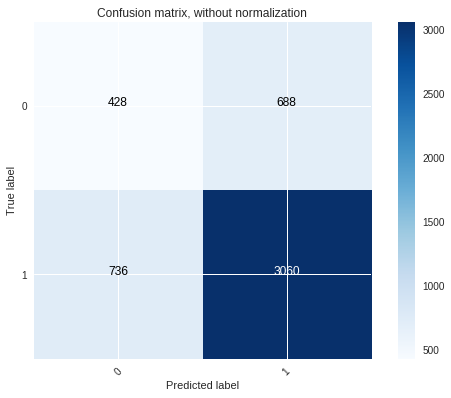

In [40]:
import itertools

from sklearn.metrics import confusion_matrix

class_names=[0,1]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
print("DecisionTreeClassifier")
plt.show()

Aproximadamente 40% fueron clasificadas correctamente para la clase 0 y un 80% para la clase 1. Para determinar cuales fueron las características que contribuyeron mayoritariamente en la clasificación usamos un algoritmo de RandomForest llamado ExtraTreesClassifier.

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

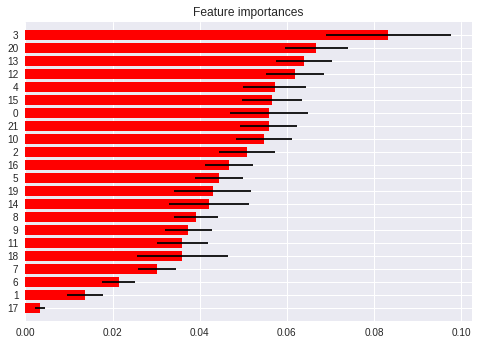

In [42]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [43]:
num_features

['post_comment_count',
 'post_favorite_count',
 'post_score',
 'post_view_count',
 'users_reputation',
 'users_up_votes',
 'users_down_votes',
 'score_prev_acceptans',
 'score_prev_ans',
 'score_prev_comment',
 'score_prev_question',
 'score_prev_favquestion',
 'age_user',
 'title_length',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_y_sentences',
 'tags_popularity',
 'num_tags',
 'num_words',
 'code_length']

La primera característica que destaca es la de el número de vistas del post, seguido del tamaño del título, las oraciones que inician con el pronombre "I". Y las características que menor aportan son el número de oraciones con el pronombre You (num_y_sentences),'users_down_votes', así como el score de las respuestas 'score_prev_acceptans' que ha dado el usuario anteriormente.
Decidimos evaluar las características por los grupos definidos inicialmente y observar cuáles grupos tienen mayor participación, eliminando los atributos de bajo valor mencionados anteriormente.

In [44]:
df_post=pd.DataFrame(data=df2, columns=['class','post_comment_count',
 'post_score',
 'post_view_count'], index=df2.index)

In [45]:
df_user=pd.DataFrame(data=df2, columns=['class','users_reputation',
 'users_up_votes',
 'score_prev_ans',
 'score_prev_comment',
 'score_prev_question',
 'age_user'], index=df2.index)

In [46]:
df_qapost=pd.DataFrame(data=df2, columns=['class','title_length',
 'num_block_code',
 'num_i_sentences',
 'num_wh_words',
 'num_tags',
 'code_length'], index=df2.index)

In [47]:
X1 = df_post.iloc[:,1:]
y1 = df_post.iloc[:,0]

clf=DecisionTreeClassifier()
y_pred1=cross_val_predict(clf, X1, y1, cv=70)
print("Decision Tree Classifier - Post features")
print(classification_report(y1, y_pred1))

Decision Tree Classifier - Post features
             precision    recall  f1-score   support

          0       0.35      0.35      0.35      1116
          1       0.81      0.81      0.81      3796

avg / total       0.71      0.71      0.71      4912



In [48]:
X2 = df_user.iloc[:,1:]
y2 = df_user.iloc[:,0]

clf=DecisionTreeClassifier()
y_pred2=cross_val_predict(clf, X2, y2, cv=70)
print("Decision Tree Classifier - User features")
print(classification_report(y2, y_pred2))

Decision Tree Classifier - User features
             precision    recall  f1-score   support

          0       0.23      0.22      0.23      1116
          1       0.77      0.79      0.78      3796

avg / total       0.65      0.66      0.65      4912



In [49]:
X2 = df_qapost.iloc[:,1:]
y2 = df_qapost.iloc[:,0]

clf=DecisionTreeClassifier()
y_pred2=cross_val_predict(clf, X2, y2, cv=70)
print("Decision Tree Classifier - Quality Post features")
print(classification_report(y2, y_pred2))

Decision Tree Classifier - Quality Post features
             precision    recall  f1-score   support

          0       0.24      0.27      0.25      1116
          1       0.78      0.74      0.76      3796

avg / total       0.65      0.63      0.64      4912



Los resultados obtenidos marcan los atributos de post con mayor precisión y recall, sin embargo creemos que no son los mejores descriptores de las clases por que posiblemente estos valores aumenten cuando un usuario responde a un post y marque un voto para el post.

## Conclusionres y trabajo futuro

Las características obtenidas claramente derivan a la clase mayoritaria, El clasificador SVC no identificó las dos clases, mientras que el Decision Tree que clasifica en un 30% las instancias de la clase minoritaria. A este punto creemos que las características obtenidas no son suficientes para la diferenciación de las clases, por lo que proponemos algunas tareas para la siguiente etapa: 

* Obtener nuevas futures respecto a la calidad e historial de usuario.
* Además deseamos clusterizar los datos incluyendo los valores eliminados, que permitan identificar grupos representativos.
* Utilizar un conjunto mayor de datos, aumentar datos equiparando las clases para evaluar nuevamente los clasificadores.

## Consideración de observaciones

* En esta etapa del trabajo se aclararon los objetivos e hipótesis que no estuvieron claras y no se comunicaron de forma efectiva.
* Se consideraron las observaciones que sugerían se analice algunos papers relacionados a examinar la calidad de una pregunta y los tags marcados en cada una. Esta observación fue redundante y considerando que nuestro objetivo era predecir si una pregunta tendrá una respuesta, consideramos esta tarea necesaria e indispensable para continuar con el trabajo. 
* En el presente informe se detallan todas las acciones realizadas en la exploración de los datos, sin embargo para la presentación se tomarán en cuenta las más relevantes. 